In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Messdaten

In [59]:
y1 = np.array([43.34, 38.35, 42.75, 51.66, 51.95, 52.25, 49.34, 50.91, 47.61, 54.31])
y2 = np.array([46.80, 60.09, 44.74, 47.09, 45.72, 42.95, 48.84, 48.35, 59.18, 48.50])
y = np.stack((y1,y2), axis=1)

### Modell-Matrizen
- A: state transition matrix
- B: constrol matrix
- C: observation matrix
- R: Messfehler (Rauschen) -> Kovarianz-Matrix
- Q: Prozessfehler (Rauschen) -> Kovarianz-Matrix

In [60]:
A = 1
B = 0
C = np.array([1, 1], dtype=float)

R = np.array([[5**2,    0],
              [   0, 6**2]], dtype=float)
Q = 0

### Intitialisation

In [61]:
x = np.zeros_like(y1)
x_m1 = np.zeros(len(x)+1)
p = np.zeros_like(x)
p_m1 = np.zeros_like(x_m1)
k = np.zeros_like(y)
e = np.zeros_like(y)

### Start-Werte

In [62]:
x_m1[0] = 60
p_m1[0] = 15**2

### Kalman-Filter berechnung

In [63]:
for n in range(len(y1)):
    k[n] = p_m1[n]*C.T@np.linalg.pinv(p_m1[n]*C@C.T + R)
    e[n] = y[n] - C*x_m1[n]
    x[n] = x_m1[n] + k[n]@e[n]
    p[n] = (1 - k[n]@C)*p_m1[n]
    x_m1[n+1] = A*x[n] # + B*u[n]
    p_m1[n+1] = A*p[n]*A + Q

### Plot

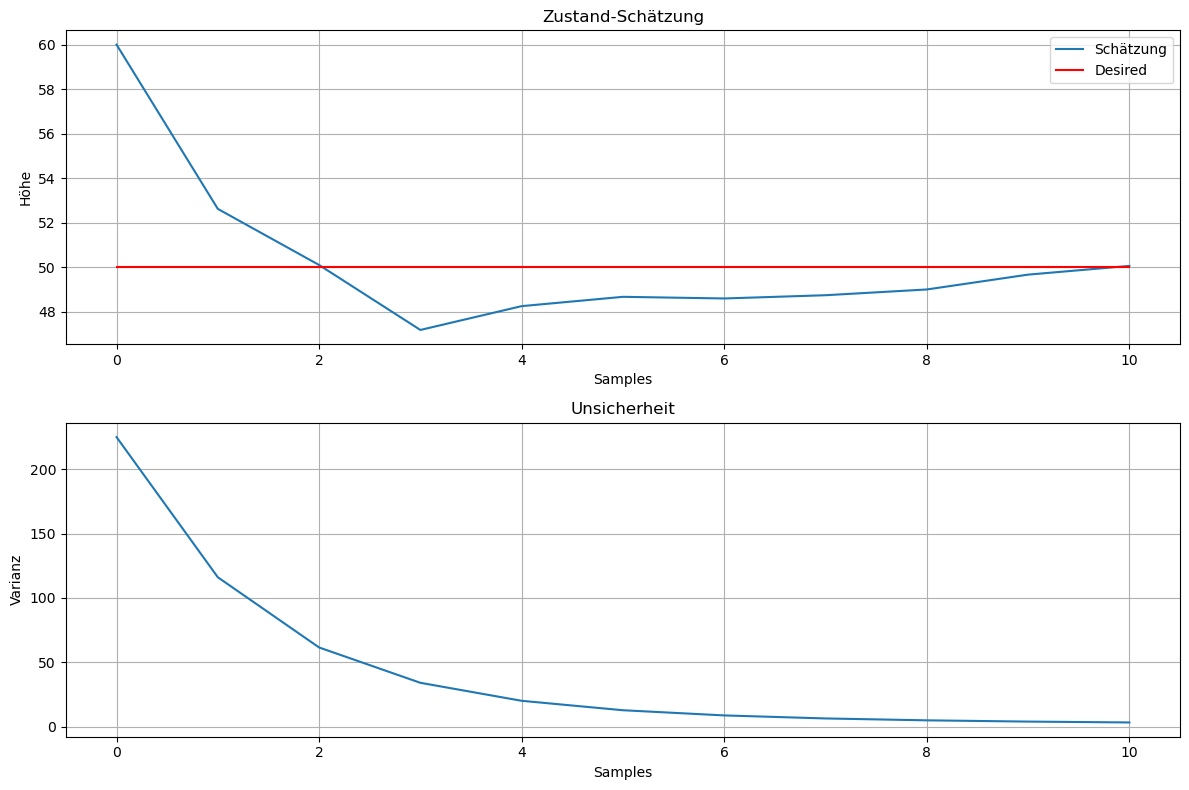

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title('Zustand-Schätzung')
plt.ylabel('Höhe')
plt.xlabel('Samples')
plt.plot(x_m1, label='Schätzung')
plt.plot([50 for _ in x_m1], c='red', label='Desired')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.title('Unsicherheit')
plt.ylabel('Varianz')
plt.xlabel('Samples')
plt.plot(p_m1)
plt.grid(True)

plt.tight_layout()
plt.show()